In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_context('talk', font_scale=0.9)
sns.set_color_codes()
sns.set_style('ticks')

%matplotlib inline

In [17]:
# get experimental data points
ecoli_data = pd.read_csv('ecoli/experimental.csv')
succ_data2 = pd.read_csv('succinogenes/experimental.csv')

In [18]:
succ_data2.sort_values('yield_mass')

,yield_mass,productivity_mass,Ref,yield_mol
2,0.599187,0.49000,Li2010,NaN
8,0.607857,0.71188,Davinia,NaN
5,0.612073,0.63000,Li2010,NaN
9,0.645616,0.87014,Davinia,NaN
6,0.690574,0.46477,Davinia,NaN
4,0.695830,0.76000,Li2010,NaN
7,0.717353,0.71939,Davinia,NaN
10,0.760259,0.55000,Du2007,1.18
3,0.766702,0.67000,Li2010,NaN
1,0.773145,0.71000,Li2010,NaN


In [19]:
# get experimental data points
ecoli_data = pd.read_csv('ecoli/experimental.csv')
succ_data = pd.read_csv('../succinogenes/experimental/yield_productivity.csv')
succ_data.columns=['yield_mass', 'productivity_mass', 'Ref']

In [20]:
print(succ_data.set_index('Ref').apply(lambda x: np.round(x, 2), 0).reset_index())

    Ref  yield_mass  productivity_mass
0     1        0.68               0.79
1     1        0.80               1.34
2     2        0.82               1.18
3     2        0.77               0.71
4     2        0.60               0.49
5     2        0.77               0.67
6     2        0.70               0.76
7     2        0.61               0.63
8     3        0.69               0.46
9     3        0.72               0.72
10    3        0.61               0.71
11    3        0.65               0.87


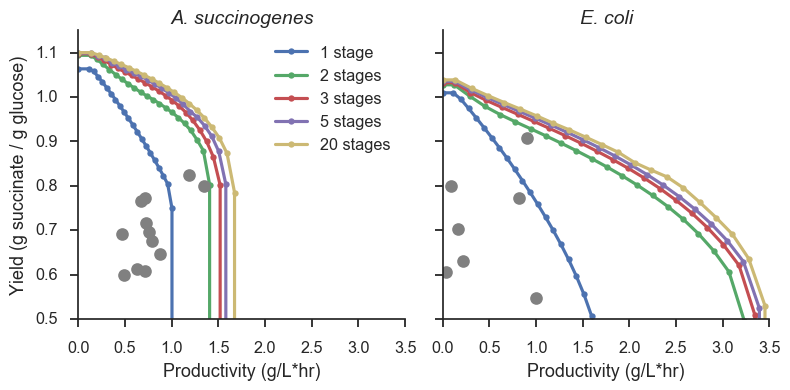

In [24]:
def load_dataframe(subdir, n_stages):
    return pd.read_pickle('{0}/{1}stage.p'.format(subdir, n_stages))

to_load = [1,2,3,5,20]
ecoli_dfs = [load_dataframe('ecoli', i) for i in to_load]
succ_dfs = [load_dataframe('succinogenes', i) for i in to_load]

fig, axmatrix = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
ax1 = axmatrix[1]
ax2 = axmatrix[0]

for i, df in zip(to_load, ecoli_dfs):
    yields = np.hstack([df.yield_mass.max(), df.yield_mass.values, 0.])
    prods = np.hstack([0., df.productivity_mass.values, df.productivity_mass.max()])
    ax1.plot(prods, yields, '.-', label='{} stages'.format(i))

for i, df in zip(to_load, succ_dfs):
    yields = np.hstack([df.yield_mass.max(), df.yield_mass.values, 0.])
    prods = np.hstack([0., df.productivity_mass.values, df.productivity_mass.max()])
    if i > 1: ax2.plot(prods, yields, '.-', label='{} stages'.format(i))
    else: ax2.plot(prods, yields, '.-', label='{} stage'.format(i))
    
ax1.plot(ecoli_data['productivity_mass'].values, ecoli_data['yield_mass'].values, 'o', color='gray')
ax2.plot(succ_data['productivity_mass'].values, succ_data['yield_mass'].values, 'o', color='gray')

ax1.set_xlabel('Productivity (g/L*hr)')
ax2.set_xlabel('Productivity (g/L*hr)')
ax2.set_ylabel('Yield (g succinate / g glucose)')

ax2.legend(loc='upper right', ncol=1)

ax1.set_ylim([0.5, 1.15])
ax1.set_xlim([0., 3.5])

ax1.set_title('E. coli', style='italic')
ax2.set_title('A. succinogenes', style='italic')

fig.tight_layout()
sns.despine()
fig.savefig('yield_surfs.svg', transparent=True)